# Healpix plotting

In [1]:
# Make sure you have healpy installed by running either command
#!conda install -c conda-forge healpy
#!pip install healpy

In [2]:
import vaex as vx
import healpy as hp
%matplotlib inline

In [3]:
tgas = vx.datasets.tgas.fetch()

## Understanding healpix with vaex
Using [healpix](https://en.wikipedia.org/wiki/HEALPix) is made available using the [healpy](healpy.readthedocs.io) package. Vaex does not need special support for healpix, only for plotting, but some helper functions are introduced to make working with healpix easier.
To understand this better, we will start from the beginning. If we want to make a density sky plot, we would like to pass healpy a 1d numpy array where each value represents the density at a location of the sphere, where the location is determined by the array size (the healpix level) and the offset (the location). Since the Gaia data includes the healpix index encoded in the `source_id`. By diving the source_id by 34359738368 you get a healpix index level 12, and diving it further will take you to lower levels.

In [4]:
level = 2
factor = 34359738368 * (4**(12-level))
nmax = hp.nside2npix(2**level)
counts = tgas.count(binby="source_id/" + str(factor), limits=[0, nmax], shape=nmax)
counts

array([  4021.,   6171.,   5318.,   7114.,   5755.,  13420.,  12711.,
        10193.,   7782.,  14187.,  12578.,  22038.,  17313.,  13064.,
        17298.,  11887.,   3859.,   3488.,   9036.,   5533.,   4007.,
         3899.,   4884.,   5664.,  10741.,   7678.,  12092.,  10182.,
         6652.,   6793.,  10117.,   9614.,   3727.,   5849.,   4028.,
         5505.,   8462.,  10059.,   6581.,   8282.,   4757.,   5116.,
         4578.,   5452.,   6023.,   8340.,   6440.,   8623.,   7308.,
         6197.,  21271.,  23176.,  12975.,  17138.,  26783.,  30575.,
        31931.,  29697.,  17986.,  16987.,  19802.,  15632.,  14273.,
        10594.,   4807.,   4551.,   4028.,   4357.,   4067.,   4206.,
         3505.,   4137.,   3311.,   3582.,   3586.,   4218.,   4529.,
         4360.,   6767.,   7579.,  14462.,  24291.,  10638.,  11250.,
        29619.,   9678.,  23322.,  18205.,   7625.,   9891.,   5423.,
         5808.,  14438.,  17251.,   7833.,  15226.,   7123.,   3708.,
         6135.,   41

Using the healpy package, we can plot this in a molleweide projection

/Users/maartenbreddels/anaconda3/envs/vaex-forge2/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


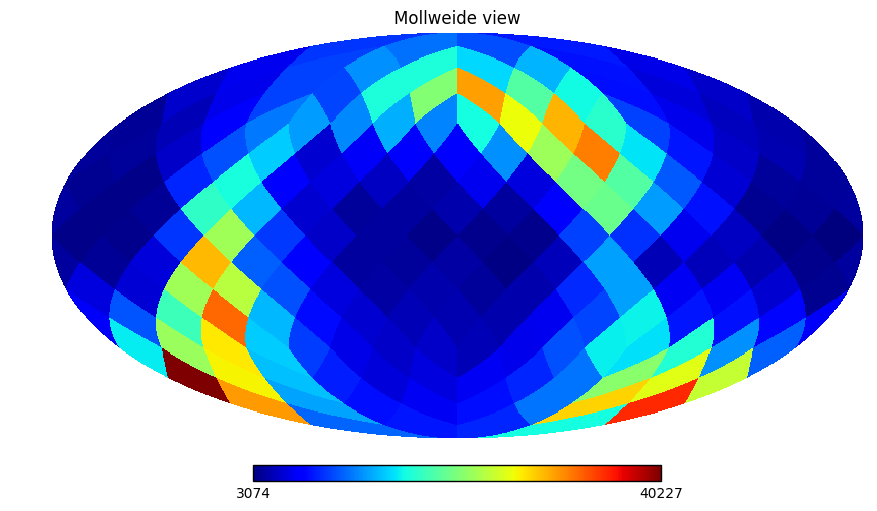

In [5]:
hp.mollview(counts, nest=True)

To avoid typing this over and over again, instead, we can use [Dataset.healpix_count](api.html#vaex.dataset.Dataset.healpix_count).

/Users/maartenbreddels/anaconda3/envs/vaex-forge2/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


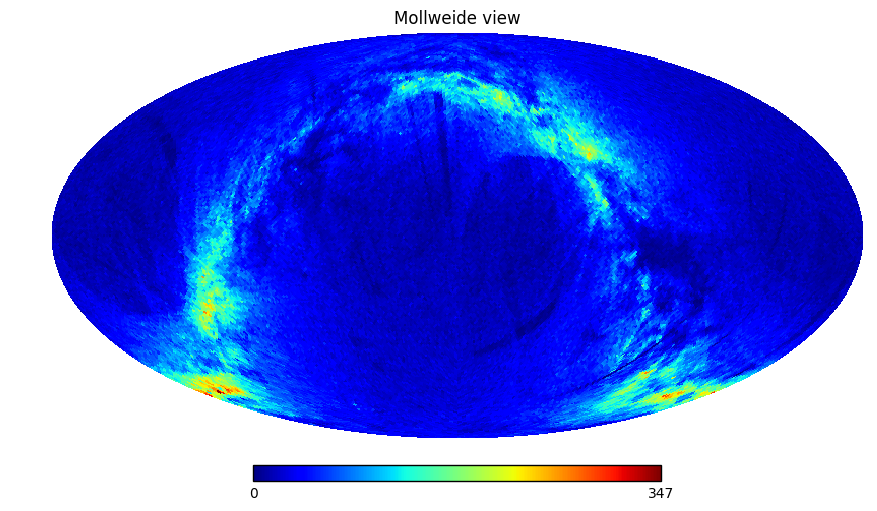

In [6]:
counts = tgas.healpix_count(healpix_level=6)
hp.mollview(counts, nest=True)

## Using vaex for plotting
Instead of using healpy, we can use vaex' [Dataset.healpix_plot](api.html#vaex.dataset.Dataset.healpix_plot) method.

/Users/maartenbreddels/anaconda3/envs/vaex-forge2/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


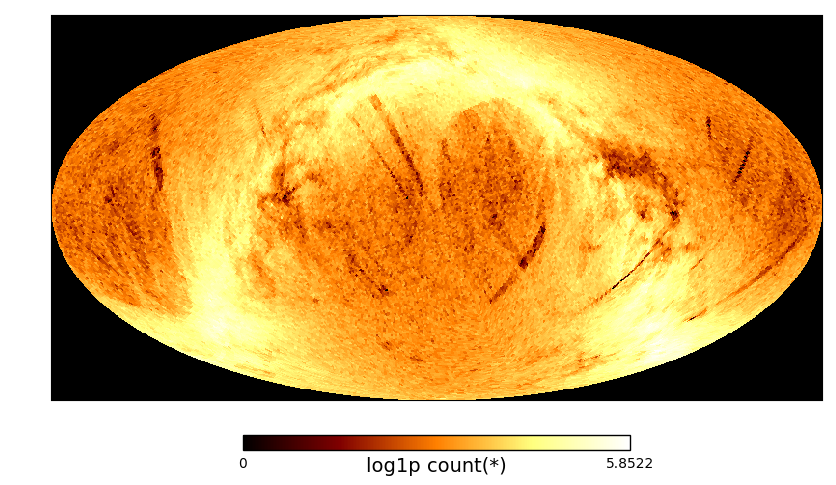

In [7]:
tgas.healpix_plot(f="log1p", healpix_level=6, figsize=(10,8), healpix_output="ecliptic")